Unit changed to kilometers.
Current user configuration:
route type to avoid:
 - none
route type to disallow:
 - none
[Your road options]
route type to avoid:
 - none
route type to disallow:
 - none
URL: https://www.mapquestapi.com/directions/v2/route?key=s289RKzpSiXWCRJhHUWeQy9AuxwxlY3k&from=washington%2C+dc&routeType=fastest&unit=k&to=baltimore%2C+md&to=parkville%2C+md
{'key': 's289RKzpSiXWCRJhHUWeQy9AuxwxlY3k', 'location': 'washington, dc'}
first dest {'key': 's289RKzpSiXWCRJhHUWeQy9AuxwxlY3k', 'location': 'parkville, md'}
Longitude of origin: -77.03196, Latitude of origin: 38.89037
Longitude of final dest: -76.53856, Latitude of dest: 39.3788
Static Map URL: https://www.mapquestapi.com/staticmap/v5/map?key=s289RKzpSiXWCRJhHUWeQy9AuxwxlY3k&sessionId=AM4A5wcAAHQAAAAMAAAACwAAABsBAAB42mOQZmRgZGZgYGDPSC1KtUrOnSrOLAnkMvz7__8_V_khC89Zx5ZHVwDp9yeWRzNgATCN59OmgjUC9dUzbN_a6rlv4YfotUD6L5DGp3Gpt6kBiB-4Q66VYdKUSZ7iGxliMoG0DpAm1kZUi67-81_wk5GBoWExQwgPAwMHB0iQhSNAQyLpxRQGhkcsSlOMlDQcFUQ4FBhUGNgEGF

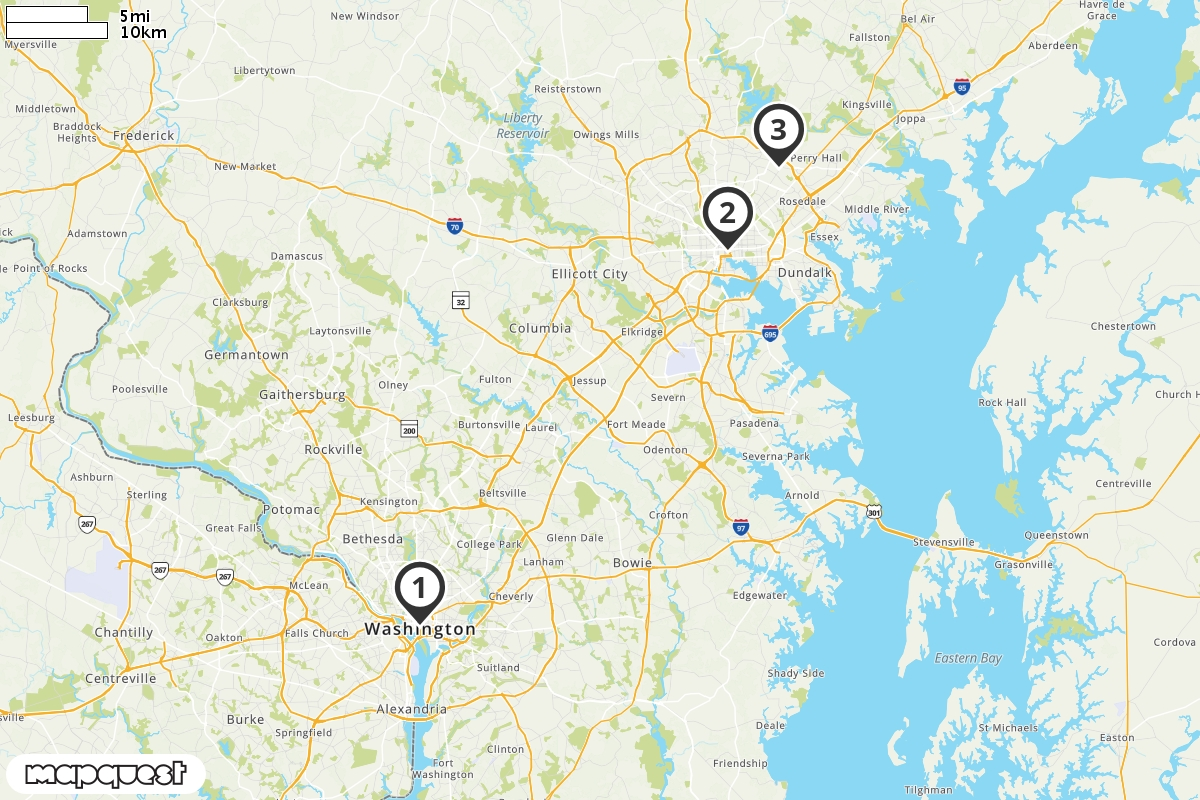

Directions from washington, dc to baltimore, md:
Trip Duration: 00:53:33
Kilometers: 105.94
Head toward Jefferson Dr SW on 14th St NW (US-1). Go for 317 m. (0.48 km)
Turn right onto Independence Ave SW. Go for 154 m. (0.32 km)
Turn left onto Raoul Wallenberg Pl SW. Go for 361 m. (0.64 km)
Turn slightly left onto Maine Ave SW. Go for 62 m. (0.16 km)
Keep left onto Maine Ave SW toward I-395 N. Go for 232 m. (0.32 km)
Take left ramp onto I-395 N (Southwest Fwy) toward South West Freeway/South Capitol Street. Go for 1.1 km. (1.77 km)
Continue on I-695 (Southeast Fwy). Go for 3.0 km. (4.83 km)
Take exit 2B toward US-50 onto DC-295 N (Anacostia Fwy). Go for 7.2 km. (11.59 km)
Continue on MD-295. Go for 50.8 km. (81.79 km)
Keep left onto Russell St (MD-295). Go for 889 m. (1.45 km)
Turn right onto W Pratt St toward I-83. Go for 623 m. (0.97 km)
Continue on E Pratt St. Go for 422 m. (0.64 km)
Turn left onto Commerce St. Go for 131 m. (0.16 km)
Continue on Commerce St. Go for 210 m. (0.32 km)
C

In [1]:
import urllib.parse
import requests
from PIL import Image, ImageFont
from io import BytesIO

main_api = "https://www.mapquestapi.com/directions/v2/route?"
static_map_api = "https://www.mapquestapi.com/staticmap/v5/map?"
key = "3vVAToG1jRZVLBtLMDdyciN3z2jmpgen"
map_options = ["map", "dark", "light", "hyb", "sat"]
key = "s289RKzpSiXWCRJhHUWeQy9AuxwxlY3k"
route_option = ""
user_avoids_option = []
user_disallows_options = []
avoids_option = []
disallows_options = []
walkingSpeed = 2.5

unit_choice = "k" #by default

# Display map function
def display_map(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.show()

def printParams(name, params):
    print("Route type to " + name + ":")
    if params == []:
        print(" - none")
    for elem in params:
        print(" - " + elem)
        
def roadConf(name, param, avoids, disallows):
    while True:
        choice = input(
name + " behavior:\n\
    - '0' : accept (default)\n\
    - '1' : avoid\n\
    - '2' : disallow\n\
$> ")
        if (choice == "0" or choice == "1" or choice == "2" or choice == ""):
            break
    if choice == "1":
        avoids.append(param)
    if choice == "2":
        disallows.append(param)

def carBasicConfig(avoid, disallows):
    roadConf("Limited access road (highways)", "Limited Access", avoid, disallows)
    roadConf("Toll road", "Toll Road", avoid, disallows)

def carExtendedConfig(avoid, disallows):
    carBasicConfig(avoid, disallows)
    roadConf("Unpaved road", "Unpaved", avoid, disallows)
    roadConf("Approximate seasonal closure road", "Approximate Seasonal Closure", avoid, disallows)
    roadConf("Tunnel road", "Tunnel", avoid, disallows)
    roadConf("Bridge road", "Bridge", avoid, disallows)
    roadConf("Country border crossing road", "Country Border Crossing", avoid, disallows)

def carCustomConfig():
    avoids_option = user_avoids_option
    disallows_options = user_disallows_options

def customUserConfig():
    print("[Custom user configuration]")
    carExtendedConfig(user_avoids_option, user_disallows_options)
    avoids_option = user_avoids_option
    disallows_options = user_disallows_options

def printUserConf():
    print("Current user configuration:")
    printParams("avoid", user_avoids_option)
    printParams("disallow", user_disallows_options)

def carOption():
    while True:
        printUserConf()
        choice = input("\
Car route configuration:\n\
    - '0' : No configuration (default)\n\
    - '1' : Custom user configuration\n\
    - '2' : Basic configuration\n\
    - '3' : Extended configuration\n\
    - '4' : Define custom user configuration\n\
$> ")
        if choice == "0" or choice == "1" or choice == "2" or choice == "3" or choice == "4" or choice == "":
            break
    if choice == "0" or choice == "":
        return
    if choice == "1":
        carCustomConfig()
    if choice == "2":
        carBasicConfig(avoids_option, disallows_options)
    if choice == "3":
        carExtendedConfig(avoids_option, disallows_options)
    if choice == "4":
        customUserConfig()

    print("[Your road options]")
    printParams("avoid", user_avoids_option)
    printParams("disallow", user_disallows_options)

def walkingConf():
    while True:
        global walkingSpeed
        choice = input("\
Choose your walking speed:\n\
    -       '0'      : " + str(walkingSpeed) + " (default)\n\
    - '[Your value]' : enter a default value up to 0.42 and under 42\n\
                       you can use a decimal point '.' one number after it (ex: 2.5)\n\
$> ")
        if choice == "" or choice == "0":
            break
        else:
            try:
                temp = float(choice)
                if temp >= 0.42 and temp <= 42.0:
                    walkingSpeed = temp
                    break
                print("/!\ bad value, please refer to the instruction and try again.")
            except:
                print("/!\ bad value, please refer to the instruction and try again.")

def routeOption():
    #Route options
    while True:
        choice = input("\
Enter a route option: \n\
    - '0' : Car with quickest drive time route (default)\n\
    - '1' : Car shortest driving distance route. \n\
    - '2' : Walking\n\
    - '3' : Bicycling\n\
$> ")
        if choice == "0" or choice == "1" or choice == "2" or choice == "3" or choice == "":
            break

    if choice == "0" or choice == "":
        route_option = "fastest"
        carOption()
    if choice == "1":
        route_option = "shortest"
        carOption()
    if choice == "2" :
        route_option = "pedestrian"
        walkingConf()
    if choice == "3" :
        route_option = "bicycle"

    return route_option

def main():
    # Loop to get user inputs and fetch directions
    while True:
        # Get units preferences:
        type_of_input = input("'name' to search the name of a city or 'coordinates' to search the coordinates of the place (lat, longitude)\n")
        if type_of_input != "name" and type_of_input != "coordinates":
            print("you need to choose between name or coordinates")
            break
        # Get origin location input
        orig = input("Starting Location: ")
        if orig == "quit" or orig == "q":
            break
        if orig == "":
            orig = "Washington, D.C."

        # Get destination inputs
        dest_list = []
        while True:
            dest = input("Enter Destination (type 'done' or 'd' when finished): ")
            if dest == "quit" or dest == "q" or dest == "done" or dest == "d":
                break
            if dest == "":
                dest_list.append("Baltimore, Md")
            else:
                dest_list.append(dest)

        if not dest_list: 
            break
        while True:
            unit_choice = str(input("Type in 'km' for kilometers or 'mi' for miles.\n"))
            if unit_choice == "km":
                print("Unit changed to kilometers.")
                unit_choice= "k"
                break
            if unit_choice == "mi":
                print("Unit changed to miles.")
                unit_choice= "m"
                break
            else:
                print("Unit not recognized. Kilometers will be used as default settings.")
                unit_choice= "k"
                break
        if unit_choice == "quit" or orig == "q":
            break
        route_option = routeOption()



        # Prepare API request "avoids":avoids_option, "disallows":disallows_options
        url_params = {"key": key, "from": orig, "routeType": route_option, "unit": unit_choice, "disallows": disallows_options, "avoids": avoids_option}
        if route_option == "pedestrian":
            url_params["walkingSpeed"] = walkingSpeed
        for dest in dest_list:
            url_params["to"] = url_params.get("to", []) + [dest]

        # Prepare geocoding API request
        url_origin = {"key": key, "location": orig}
        url_dest = {"key": key, "location": dest}

        # Construct the API request URLs
        url = main_api + urllib.parse.urlencode(url_params, doseq=True)
        print("URL: " + (url))
        # Send the API request and parse the JSON response
        json_data = requests.get(url).json()
        json_status = json_data["info"]["statuscode"]
        print(url_origin)
        # Get coordinates by city name and print it
        if type_of_input == "name":
            print("first dest", url_dest)
            json_geocoding = requests.get('https://www.mapquestapi.com/geocoding/v1/address?' + urllib.parse.urlencode(url_origin,doseq=True)).json()
            json_geocoding2 = requests.get('https://www.mapquestapi.com/geocoding/v1/address?' + urllib.parse.urlencode(url_dest,doseq=True)).json()
            json_origin_lng = json_geocoding["results"][0]["locations"][0]["latLng"]["lng"]
            json_origin_lat = json_geocoding["results"][0]["locations"][0]["latLng"]["lat"]
            json_dest_lng = json_geocoding2["results"][0]["locations"][0]["latLng"]["lng"]
            json_dest_lat = json_geocoding2["results"][0]["locations"][0]["latLng"]["lat"]

            print("Longitude of origin: " + str(json_origin_lng) + ", Latitude of origin: " + str(json_origin_lat))
            print("Longitude of final dest: " + str(json_dest_lng) + ", Latitude of dest: " + str(json_dest_lat))

        # Get the route Id for the map if the request is successful
        map_session = json_data["route"]["sessionId"] if json_status == 0 else ""

        # Choose map type, default is "map"
        map_type = input("Enter map type (map, hyb, sat, light, dark): ")
        if map_type == "q" or map_type == "quit":
            break
        elif map_type == "":
            map_type = "map"
        while map_type not in map_options:
            map_type = input("Invalid map type, try again : ")
        # Check if there are multiple locations and construct map request
        if len(dest_list) > 1:
            static_map_params = {
                "key": key,
                "sessionId": map_session,
                "size": "600,400@2x",
                "locations":orig + '||' + '||'.join(map(str,dest_list)),
                "defaultMarker":"marker-num",
                "type": map_type,
                "scalebar":"true",
                "traffic":"flow|cons",
            }
        else:
            static_map_params = {
                "key": key,
                "sessionId": map_session,
                "size": "600,400@2x",
                "start": orig + "|flag-start",
                "end": dest_list[-1] + "|flag-end",
                "type": map_type,
                "scalebar":"true",
                "traffic":"flow|cons",
            }
        # Construct the API request URL
        static_map_url = static_map_api + urllib.parse.urlencode(static_map_params)
        print("Static Map URL: " + static_map_url)



        if json_status == 0:
            print("API Status: " + str(json_status) + " = A successful route call.\n")
            print("=============================================")
            # Display map
            display_map(static_map_url)
            total_duration = 0  # in seconds
            total_distance = 0  # in km
            # Loop through each destination and print directions for each leg
            for i, (dest, leg) in enumerate(zip(dest_list, json_data["route"]["legs"])):
                print(f"Directions from {orig if i == 0 else dest_list[i-1]} to {dest}:")
                print("Trip Duration: " + (leg["formattedTime"]))
                print("Kilometers: " + str("{:.2f}".format((leg["distance"]) * 1.61)))
                print("=============================================")
                # Print the maneuvers for each leg
                for maneuver in leg["maneuvers"]:
                    print((maneuver["narrative"]) + " (" + str("{:.2f}".format((maneuver["distance"]) * 1.61)) + " km)")
                print("=============================================\n")
                # Add the leg duration and distance to the total trip duration and distance
                total_duration += leg["time"] 
                total_distance += leg["distance"] * 1.61

            # print coordinates of destinations if name inputted
            if type_of_input == "name":
                a = 1
                for i, (dest) in enumerate(zip(dest_list)):
                    url_dest = {"key": key, "location": dest}
                    json_geocoding3 = requests.get(
                        'https://www.mapquestapi.com/geocoding/v1/address?' + urllib.parse.urlencode(url_dest,
                                                                                                     doseq=True)).json()
                    json_dest_lng = json_geocoding3["results"][0]["locations"][0]["latLng"]["lng"]
                    json_dest_lat = json_geocoding3["results"][0]["locations"][0]["latLng"]["lat"]
                    print("Longitude of dest n°" + str(a) + ": " + str(json_dest_lng) + ", Latitude of dest: " + str(
                        json_dest_lat))
                    a = a + 1
            # Print the total trip duration and distance    
            print("Total Trip Duration: " + "{:02d}:{:02d}:{:02d}".format(total_duration // 3600, (total_duration % 3600) // 60, total_duration % 60))
            print("Total Trip Kilometers: " + str("{:.2f}".format(total_distance))+ "\n")



        # Handle other status codes (errors) and print relevant messages        
        elif json_status == 402:
            print("**********************************************")
            print("Status Code: " + str(json_status) + "; Invalid user inputs for one or both locations.")
            print("**********************************************\n")
        elif json_status == 611:
            print("**********************************************")
            print("Status Code: " + str(json_status) + "; Missing an entry for one or both locations.")
            print("**********************************************\n")
        else:
            print("************************************************************************")
            print("For Staus Code: " + str(json_status) + "; Refer to:")
            print("https://developer.mapquest.com/documentation/directions-api/status-codes")
            print("************************************************************************\n")

if __name__ == "__main__":
    main()

